6. Data Exploration

In [175]:
#Creating a column which shows the total amount of days that passed between the day the crime was committed, and the day it was reported.
df_cleaned['Days Elapsed'] = (pd.to_datetime(df_cleaned['Date Reported']) - pd.to_datetime(df_cleaned['Date Occurred'])).dt.days

#Creating Year, Quarter, Month columns
df_cleaned['Year'] = pd.to_datetime(df_cleaned['Date Occurred']).dt.year
df_cleaned['Quarter'] = pd.to_datetime(df_cleaned['Date Occurred']).dt.quarter
df_cleaned['Month'] = pd.to_datetime(df_cleaned['Date Occurred']).dt.month_name()

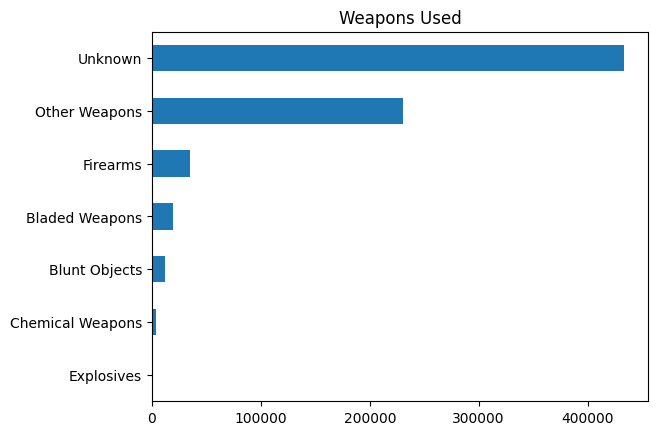

In [176]:
#General view of weapons used in crimes
df_cleaned['Weapon Used'].value_counts().sort_values().plot(kind='barh')
plt.title('Weapons Used')
plt.ylabel('')
plt.xlabel('')
plt.show()

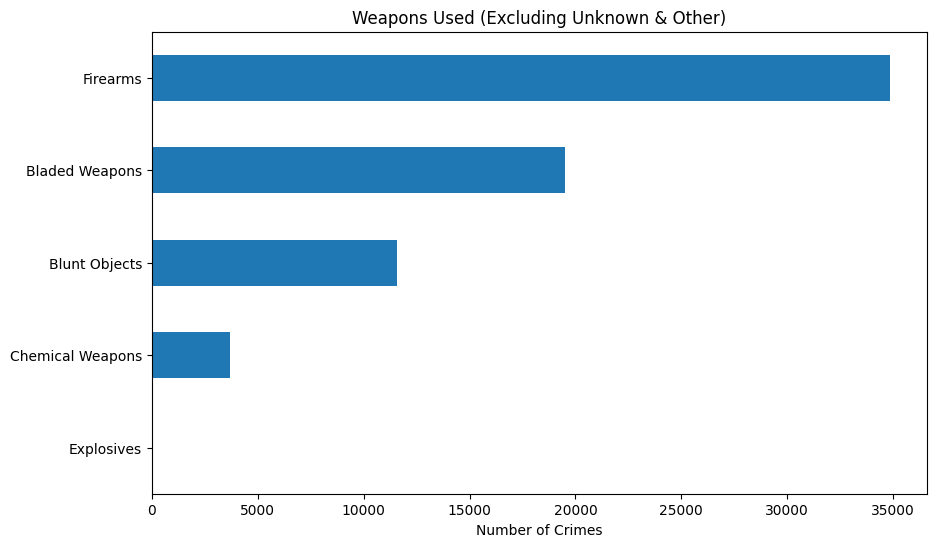

In [177]:
df_filtered = df_cleaned[~df_cleaned['Weapon Used'].isin(['Unknown', 'Other Weapons'])]

df_filtered['Weapon Used'].value_counts().sort_values().plot(kind='barh', figsize=(10,6))
plt.xlabel('Number of Crimes')
plt.ylabel('')
plt.title('Weapons Used (Excluding Unknown & Other)')
plt.show()

In [178]:
#Calculating the average days it takes to report a crime

print(f'{np.floor(df_cleaned['Days Elapsed'].mean())} Days')

13.0 Days


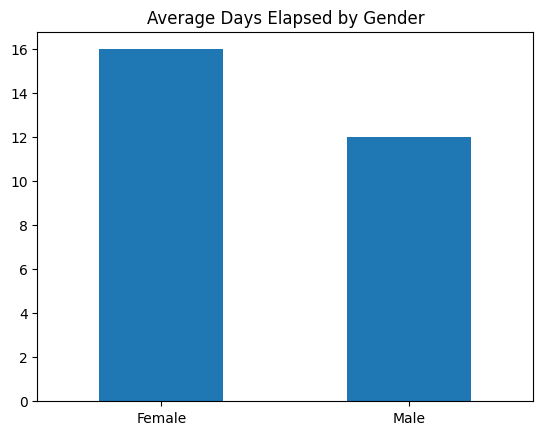

In [179]:
#Calculating the average days it takes to report a crime by gender

genders_df = df_cleaned.pivot_table(
    index='Victim Sex',
    values='Days Elapsed',
    aggfunc='mean'
).apply(np.floor)

genders_df = genders_df[genders_df.index != 'UNKNOWN']

genders_df.plot(kind='bar', legend=False)
plt.title('Average Days Elapsed by Gender')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Ensures x-axis labels are readable

plt.show()

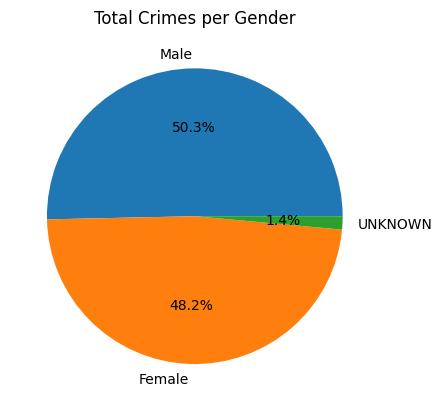

In [180]:
df_cleaned['Victim Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Total Crimes per Gender')
plt.ylabel('')
plt.show()

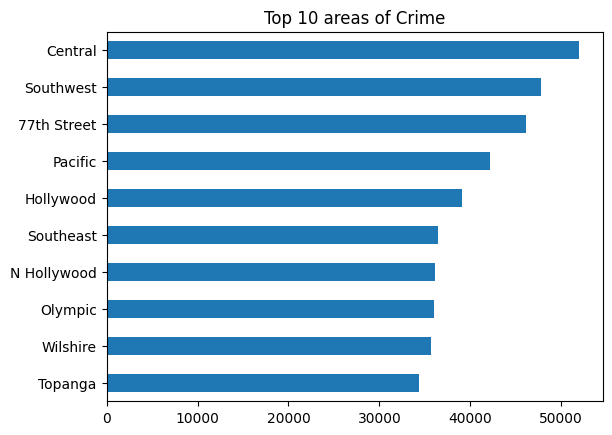

In [181]:
df_cleaned['Area Name'].value_counts().head(10).sort_values().plot(kind='barh',)
plt.title('Top 10 areas of Crime')
plt.xlabel('')
plt.ylabel('')
plt.show()

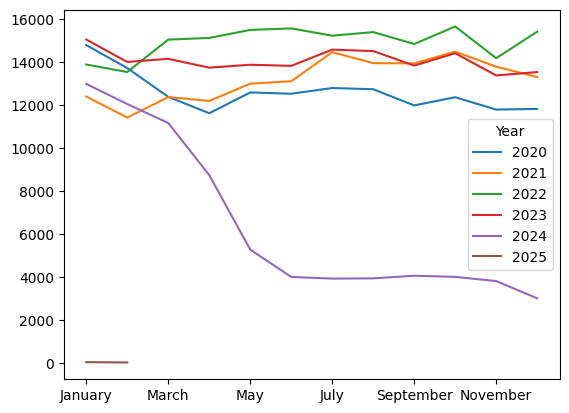

In [182]:
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Convert 'Month' column to a categorical type with the correct order
df_cleaned["Month"] = pd.Categorical(df_cleaned["Month"], categories=month_order, ordered=True)

years_and_months_df = df_cleaned.pivot_table(
    index="Month",
    values="Victim Age",
    columns="Year",
    aggfunc="count",
    observed=True
)

years_and_months_df = years_and_months_df.sort_index()
years_and_months_df.plot()
plt.xlabel('')
plt.show()

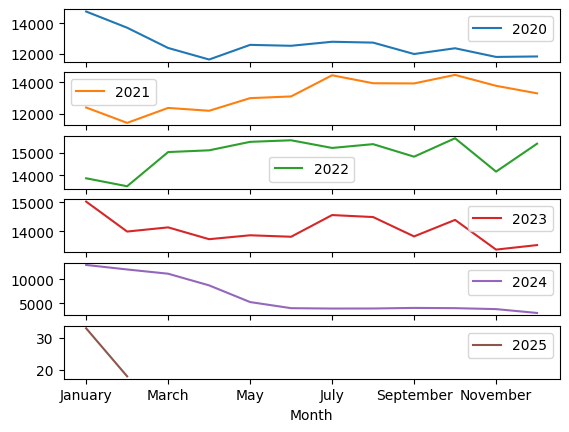

In [183]:
years_and_quarters_df = df_cleaned.pivot_table(
    index="Month",
    values="Victim Age",
    columns="Year",
    aggfunc="count",
    observed=True
)

years_and_months_df = years_and_months_df.sort_index()
years_and_months_df.plot(subplots=True)
plt.show()

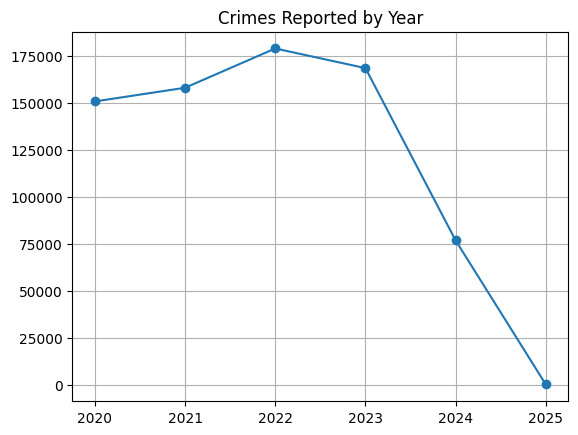

In [184]:
years_df = df_cleaned['Year'].value_counts().sort_index()
years_df.plot(marker='o')
plt.title('Crimes Reported by Year')
plt.xlabel('')
plt.grid(True)

plt.show()

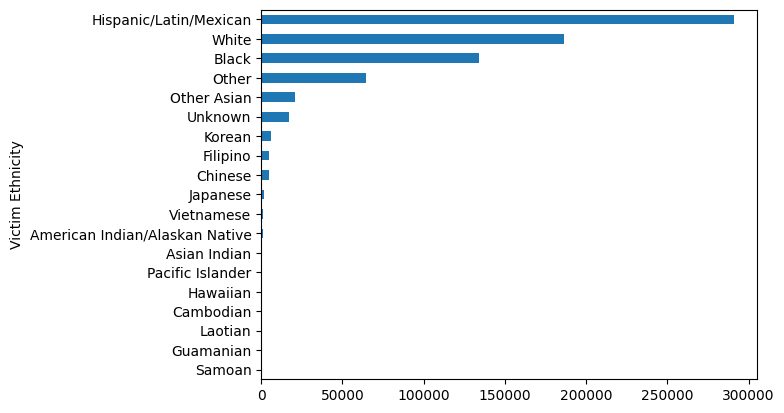

In [185]:
#Total crimes by ethnicity
victim_Ethnicity = df_cleaned['Victim Ethnicity'].value_counts().sort_values()
victim_Ethnicity.plot(kind='barh')
plt.show()

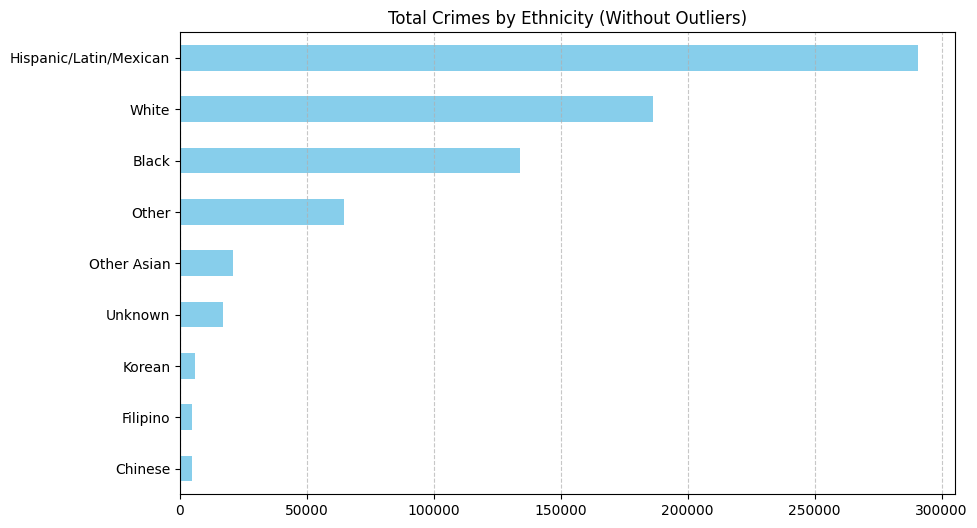

In [ ]:
# Filter out outlier ethnicities
valid_ethnicities = [
    'Chinese', 'Filipino', 'Korean', 'Unknown', 
    'Other Asian', 'Other', 'Black', 'White', 'Hispanic/Latin/Mexican']
filtered_df = df_cleaned[df_cleaned['Victim Ethnicity'].isin(valid_ethnicities)]

# Count occurrences
ethnicity_counts = filtered_df['Victim Ethnicity'].value_counts().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
ethnicity_counts.plot(kind='barh', color='skyblue')
plt.xlabel('')
plt.ylabel('')
plt.title('Total Crimes by Ethnicity (Without Outliers)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()